In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

Init Plugin
Init Graph Optimizer
Init Kernel
2.5.0


### Get the data
First import the dataset using pandas:
(make sure to change file path to correct one)

In [3]:
def read_data(device,dates):
    
    path = '/Users/rshara01-local/WORK/linacTune/acsys/'
    files = ['%s%s_%s.csv'%(path,date,device) for date in dates]

    raw_datasets = [pd.read_csv(file) for file in files]

    return raw_datasets

In [4]:
def full_device_name(device):
    devname ='L:'
    if device=='V5Q':
        devname = '%s%sSET'%(devname,device)
    elif device=='RFQ':
        devname = '%s%sPAH'%(devname,device)
    elif device=='RFB':
        devname = '%s%sPAH'%(devname,device)
    else:
        print('Invalid device name')
        exit(0)
    return devname

In [5]:
def skim_data(device, raw_datasets):

    datasets = []
    for raw_dataset in raw_datasets:
        dataset = raw_dataset.copy()
        dataset.drop(list(dataset.filter(regex = 'Timestamp')), axis = 1, inplace = True)
        #dataset.drop(columns=['idx'], inplace = True)
        lossmons = dataset.copy()
        lossmons = lossmons.filter(regex="LM|%s"%device, axis=1)
        lossmons.dropna(inplace=True)
        lossmons.reset_index(drop=True, inplace=True)
        datasets.append(lossmons)
    
    #nullidx=df.isna().to_numpy().nonzero()[0].tolist()
    #df = df.drop(axis=0, index=nullidx)
    
    return datasets

In [6]:
#sns.pairplot(datasets[0][['L:V5QSET','L:D14LM','L:D21LM','L:D24LM', 'L:D31LM', 'L:D33LM','L:D34LM' ,'L:D42LM','L:D43LM','L:D54LM','L:D7LMSM']], kind='scatter',diag_kind='kde', height=1.5)

In [38]:
def calc_deltas(device,datasets):
    dfs=[]
    for dataset in datasets:
        df = dataset.copy()
        for (columnName, columnData) in df.iteritems():
            if columnName.find("LM")!=-1:
                #df.loc[:,columnName] = df[columnName].apply(lambda x: (x - df.loc[0][columnName])/abs(df.loc[0][columnName]))
                df.loc[:,columnName] = df[columnName].apply(lambda x: x - df.loc[0][columnName])
            elif columnName.find(device)!=-1:
                df.loc[:,columnName] = df[columnName].apply(lambda x: x - df.loc[0][columnName])
            else:
                continue
        df.drop([0],inplace=True)
        df.reset_index(drop=True,inplace=True)
        dfs.append(df)
        
    return dfs

In [39]:
def plot_losses(devname, dfs):
    %matplotlib widget
    fig, axs = plt.subplots(7,4, sharex=True)
    fig.set_size_inches(9., 14.)
    fig.supxlabel(r'$\Delta \phi_m$ [deg]')
    fig.supylabel(r'$\frac{\Delta L}{L_m}$')
    fig.tight_layout()
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    labels=[]
    
    for i in range(0,7):
        for j in range(0,4):
            [axs[i,j].plot(df[devname],df['L:D%s%sLM'%(i+1,j+1)]) for df in dfs]
            labels.append('L:D%s%sLM'%(i+1,j+1))
            
    for i,ax in enumerate(axs.flat):
        ax.set_title(labels[i])
        #ax.label_outer()

    plt.legend(dates,loc='lower right', bbox_to_anchor=(1.0, -0.42),
          ncol=3, fancybox=True, shadow=True, fontsize='small')
    plt.savefig("%s_scans.png"%devname[2:])
    plt.savefig("%s_scans.pdf"%devname[2:])

In [46]:
def plot_one_loss(devname,lmname,dfs):
    %matplotlib widget
    plt.xlabel(r'$\Delta \phi_m$ [deg]')
    plt.ylabel(r'$\frac{\Delta L}{L_m}$')
    plt.title('%s vs %s'%(lmname,devname))
    plt.grid(color='k', linestyle='-', linewidth=1)
    [ plt.plot(df[devname],df[lmname]) for df in dfs ]
    plt.legend(dates,ncol=3,fontsize='x-small')
    #plt.tight_layout
    

L:V5QSET


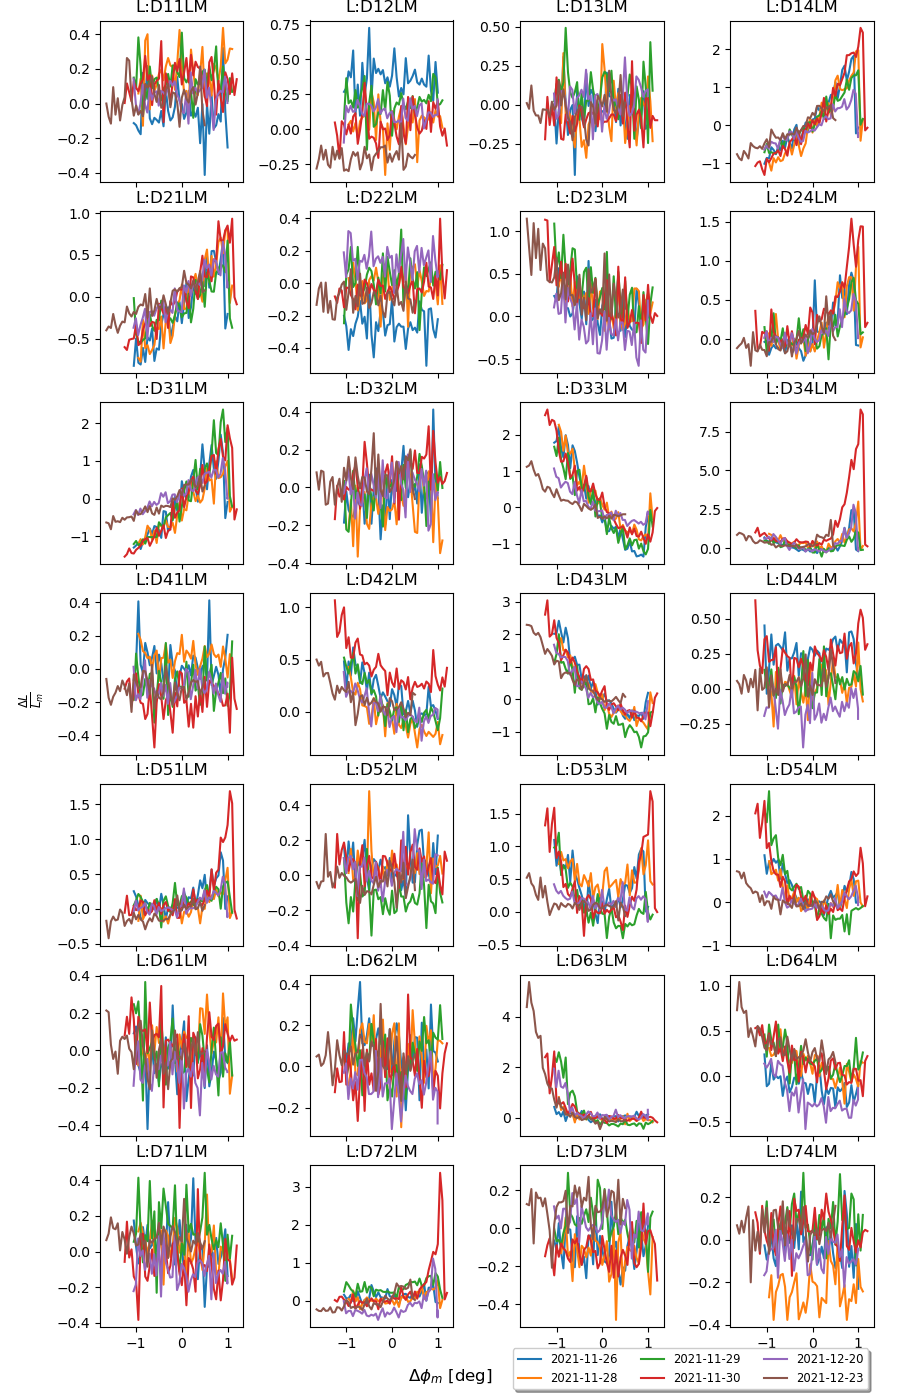

In [55]:
dates = ['2021-11-26', '2021-11-28', '2021-11-29', '2021-11-30','2021-12-20','2021-12-23']
device ='V5Q'

raw_datasets = read_data(device,dates)
datasets = skim_data(device,raw_datasets)
dfs=calc_deltas(device,datasets)

devname = full_device_name(device) 
print(devname)

plot_losses(devname,dfs)


0    0.753784
1    0.375366
2    0.521851
3    0.549316
4    0.842285
5    0.637817
6    0.430298
7    0.509644
8    0.497437
9    0.457764
Name: L:D31LM, dtype: float64
0   -0.378418
1   -0.231934
2   -0.204468
3    0.088501
4   -0.115967
5   -0.323486
6   -0.244141
7   -0.256348
8   -0.296021
9   -0.286865
Name: L:D31LM, dtype: float64


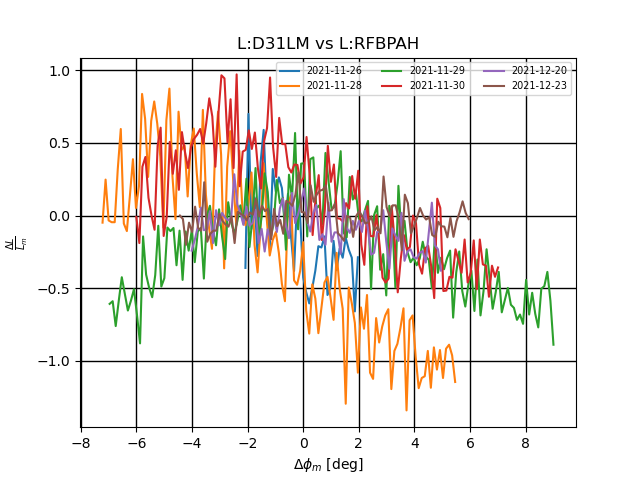

In [54]:
plot_one_loss(devname,'L:D31LM',dfs)
print(datasets[4]['L:D31LM'].head(10))
print(dfs[4]['L:D31LM'].head(10))